In [1]:
import numpy as np 
import pandas as pd
import tensorflow as tf
import os
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("datasets/PRSA_Data_Aotizhongxin_20130301-20170228.csv")
df

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,35060,2017,2,28,19,12.0,29.0,5.0,35.0,400.0,95.0,12.5,1013.5,-16.2,0.0,NW,2.4,Aotizhongxin
35060,35061,2017,2,28,20,13.0,37.0,7.0,45.0,500.0,81.0,11.6,1013.6,-15.1,0.0,WNW,0.9,Aotizhongxin
35061,35062,2017,2,28,21,16.0,37.0,10.0,66.0,700.0,58.0,10.8,1014.2,-13.3,0.0,NW,1.1,Aotizhongxin
35062,35063,2017,2,28,22,21.0,44.0,12.0,87.0,700.0,35.0,10.5,1014.4,-12.9,0.0,NNW,1.2,Aotizhongxin


In [4]:
df.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34139.000000,34346.000000,34129.000000,34041.000000,33288.000000,33345.000000,35044.000000,35044.000000,35044.000000,35044.000000,35050.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,82.773611,110.060391,17.375901,59.305833,1262.945145,56.353358,13.584607,1011.846920,3.123062,0.067421,1.708496
std,10122.249256,1.177213,3.448752,8.800218,6.922285,82.135694,95.223005,22.823017,37.116200,1221.436236,57.916327,11.399097,10.404047,13.688896,0.910056,1.204071
min,1.000000,2013.000000,1.000000,1.000000,0.000000,3.000000,2.000000,0.285600,2.000000,100.000000,0.214200,-16.800000,985.900000,-35.300000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,22.000000,38.000000,3.000000,30.000000,500.000000,8.000000,3.100000,1003.300000,-8.100000,0.000000,0.900000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,58.000000,87.000000,9.000000,53.000000,900.000000,42.000000,14.500000,1011.400000,3.800000,0.000000,1.400000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,114.000000,155.000000,21.000000,82.000000,1500.000000,82.000000,23.300000,1020.100000,15.600000,0.000000,2.200000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,898.000000,984.000000,341.000000,290.000000,10000.000000,423.000000,40.500000,1042.000000,28.500000,72.500000,11.200000


In [5]:
df.isnull().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       925
PM10        718
SO2         935
NO2        1023
CO         1776
O3         1719
TEMP         20
PRES         20
DEWP         20
RAIN         20
wd           81
WSPM         14
station       0
dtype: int64

In [6]:
df = df[['PM2.5','year','month','day','hour']]
df

,PM2.5,year,month,day,hour
0,4.0,2013,3,1,0
1,8.0,2013,3,1,1
2,7.0,2013,3,1,2
3,6.0,2013,3,1,3
4,3.0,2013,3,1,4
...,...,...,...,...,...
35059,12.0,2017,2,28,19
35060,13.0,2017,2,28,20
35061,16.0,2017,2,28,21
35062,21.0,2017,2,28,22


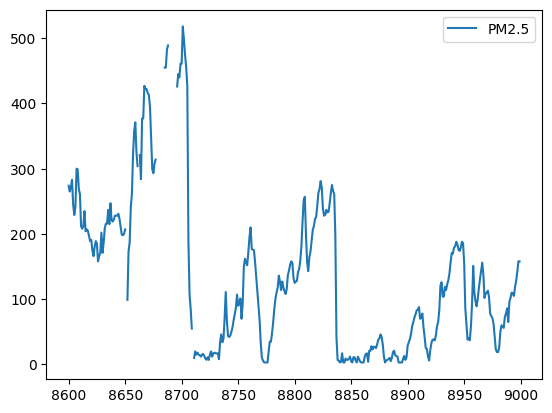

In [7]:
plt.plot(df['PM2.5'][8600:9000],label='PM2.5')
plt.legend()

In [ ]:
INTERPOLATION

In [8]:
# Fill missing values with interpolation
df['PM2.5'].interpolate(inplace=True)

C:\Users\kpk16\AppData\Local\Temp\ipykernel_7924\2022851265.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['PM2.5'].interpolate(inplace=True)
C:\Users\kpk16\AppData\Local\Temp\ipykernel_7924\2022851265.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['PM2.5'].interpolate(inplace=True)


In [9]:
df.isnull().sum()

PM2.5    0
year     0
month    0
day      0
hour     0
dtype: int64

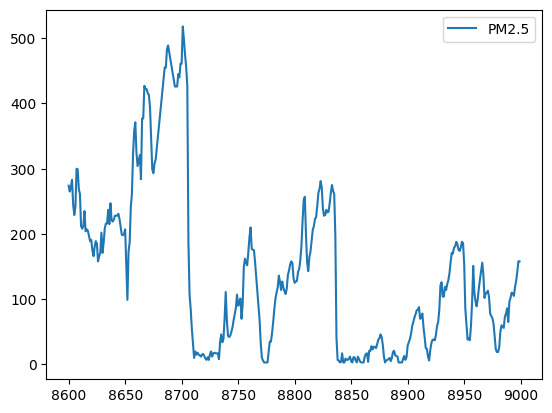

In [10]:
plt.plot(df['PM2.5'][8600:9000],label='PM2.5')
plt.legend()

In [11]:
df.describe()

,PM2.5,year,month,day,hour
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000
mean,82.540623,2014.662560,6.522930,15.729637,11.500000
std,81.956401,1.177213,3.448752,8.800218,6.922285
min,3.000000,2013.000000,1.000000,1.000000,0.000000
25%,22.000000,2014.000000,4.000000,8.000000,5.750000
50%,58.000000,2015.000000,7.000000,16.000000,11.500000
75%,114.000000,2016.000000,10.000000,23.000000,17.250000
max,898.000000,2017.000000,12.000000,31.000000,23.000000


In [12]:
df

,PM2.5,year,month,day,hour
0,4.0,2013,3,1,0
1,8.0,2013,3,1,1
2,7.0,2013,3,1,2
3,6.0,2013,3,1,3
4,3.0,2013,3,1,4
...,...,...,...,...,...
35059,12.0,2017,2,28,19
35060,13.0,2017,2,28,20
35061,16.0,2017,2,28,21
35062,21.0,2017,2,28,22


In [13]:
df['hour_sin'] = np.sin(2 * np.pi * df['hour']/24.0)
df['hour_cos'] = np.cos(2 * np.pi * df['hour']/24.0)
df['month_sin'] = np.sin(2 * np.pi * df['month']/12)
df['month_cos'] = np.cos(2 * np.pi * df['month']/12)
df['day_sin'] = np.sin(2 * np.pi * df['day']/31)
df['day_cos'] = np.cos(2 * np.pi * df['day']/31)

C:\Users\kpk16\AppData\Local\Temp\ipykernel_7924\1055069242.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['hour_sin'] = np.sin(2 * np.pi * df['hour']/24.0)
C:\Users\kpk16\AppData\Local\Temp\ipykernel_7924\1055069242.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['hour_cos'] = np.cos(2 * np.pi * df['hour']/24.0)
C:\Users\kpk16\AppData\Local\Temp\ipykernel_7924\1055069242.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_index

In [14]:
df.head()


,PM2.5,year,month,day,hour,hour_sin,hour_cos,month_sin,month_cos,day_sin,day_cos
0,4.0,2013,3,1,0,0.000000,1.000000,1.0,6.123234e-17,0.201299,0.97953
1,8.0,2013,3,1,1,0.258819,0.965926,1.0,6.123234e-17,0.201299,0.97953
2,7.0,2013,3,1,2,0.500000,0.866025,1.0,6.123234e-17,0.201299,0.97953
3,6.0,2013,3,1,3,0.707107,0.707107,1.0,6.123234e-17,0.201299,0.97953
4,3.0,2013,3,1,4,0.866025,0.500000,1.0,6.123234e-17,0.201299,0.97953


In [15]:
df = df.drop(['year'],axis=1)

In [16]:
df

,PM2.5,month,day,hour,hour_sin,hour_cos,month_sin,month_cos,day_sin,day_cos
0,4.0,3,1,0,0.000000,1.000000,1.000000,6.123234e-17,0.201299,0.979530
1,8.0,3,1,1,0.258819,0.965926,1.000000,6.123234e-17,0.201299,0.979530
2,7.0,3,1,2,0.500000,0.866025,1.000000,6.123234e-17,0.201299,0.979530
3,6.0,3,1,3,0.707107,0.707107,1.000000,6.123234e-17,0.201299,0.979530
4,3.0,3,1,4,0.866025,0.500000,1.000000,6.123234e-17,0.201299,0.979530
...,...,...,...,...,...,...,...,...,...,...
35059,12.0,2,28,19,-0.965926,0.258819,0.866025,5.000000e-01,-0.571268,0.820763
35060,13.0,2,28,20,-0.866025,0.500000,0.866025,5.000000e-01,-0.571268,0.820763
35061,16.0,2,28,21,-0.707107,0.707107,0.866025,5.000000e-01,-0.571268,0.820763
35062,21.0,2,28,22,-0.500000,0.866025,0.866025,5.000000e-01,-0.571268,0.820763


UNCODED FEATURES

In [17]:
df1 = df[['PM2.5','month','day','hour']]

In [18]:
df1

,PM2.5,month,day,hour
0,4.0,3,1,0
1,8.0,3,1,1
2,7.0,3,1,2
3,6.0,3,1,3
4,3.0,3,1,4
...,...,...,...,...
35059,12.0,2,28,19
35060,13.0,2,28,20
35061,16.0,2,28,21
35062,21.0,2,28,22


In [19]:
def df_to_X_y2(df, window_size):
    df_as_np = df.to_numpy()
    X = []
    y = []
    for i in range(len(df_as_np)-window_size):
        row = [r for r in df_as_np[i:i+window_size]]
        X.append(row)
        label = df_as_np[i+window_size][0]
        y.append(label)
    return np.array(X), np.array(y)

In [20]:
window_size = 10
X1, y1 = df_to_X_y2(df1,window_size)
X1.shape, y1.shape

((35054, 10, 4), (35054,))

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

In [22]:
X1_train, y1_train = X1[:25000], y1[:25000]
X1_val, y1_val = X1[25000:30000], y1[25000:30000]
X1_test, y1_test = X1[30000:], y1[30000:]
X1_train.shape, y1_train.shape, X1_val.shape, y1_val.shape, X1_test.shape, y1_test.shape

((25000, 10, 4), (25000,), (5000, 10, 4), (5000,), (5054, 10, 4), (5054,))

DNN

In [24]:
model2 = Sequential()
model2.add(InputLayer(shape=(10,4)))
model2.add(Flatten())
# model2.add(Dense(64, activation='relu'))
model2.add(Dense(32, activation='relu'))
model2.add(Dense(16, activation='relu'))
model2.add(Dense(8, activation='relu'))
model2.add(Dense(1, activation='linear'))

In [26]:
cp1 = ModelCheckpoint('model2/model_checkpoint.keras', save_best_only=True)
model2.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.005), metrics=[RootMeanSquaredError()])


In [27]:
model2.fit(X1_train, y1_train, validation_data=(X1_val, y1_val), epochs=10, callbacks=[cp1])

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 998us/step - loss: 781.1721 - root_mean_squared_error: 27.3119 - val_loss: 647.5900 - val_root_mean_squared_error: 25.4478
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 867us/step - loss: 521.6520 - root_mean_squared_error: 22.8060 - val_loss: 304.8365 - val_root_mean_squared_error: 17.4596
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 854us/step - loss: 432.0616 - root_mean_squared_error: 20.7726 - val_loss: 296.3173 - val_root_mean_squared_error: 17.2139
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 912us/step - loss: 425.0812 - root_mean_squared_error: 20.5896 - val_loss: 307.4463 - val_root_mean_squared_error: 17.5341
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 963us/step - loss: 409.7363 - root_mean_squared_error: 20.2298 - val_loss: 327.8628 - val_root_mean_squared_error: 18.1070
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 835us/step - loss: 425.5635 - root_mean_squared_error: 20.5996 - val_loss: 400.8301 - val_root_mean_squared_error: 20.0207
Epoc

In [29]:
from tensorflow.keras.models import load_model
model2 = load_model('model2/model_checkpoint.keras')

In [30]:
train_predictions = model2.predict(X1_train).flatten()
train_results = pd.DataFrame(data={'Train Predictions':train_predictions, 'Actuals':y1_train})
train_results.head()

782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 944us/step


,Train Predictions,Actuals
0,4.031908,3.0
1,3.497800,3.0
2,3.718085,3.0
3,3.831476,3.0
4,3.832186,6.0


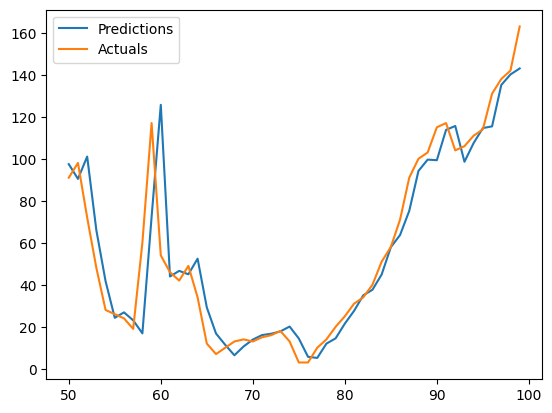

In [31]:
import matplotlib.pyplot as plt
plt.plot(train_results['Train Predictions'][50:100],label= 'Predictions')
plt.plot(train_results['Actuals'][50:100], label= 'Actuals')
plt.legend()

In [32]:
val_predictions = model2.predict(X1_val).flatten()
val_results = pd.DataFrame(data={'Val Predictions':val_predictions, 'Actuals':y1_val})
val_results.head()

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 929us/step


,Val Predictions,Actuals
0,8.426696,9.0
1,8.924641,11.0
2,9.994060,10.0
3,9.678588,10.0
4,10.345249,10.0


In [33]:
test_predictions = model2.predict(X1_test).flatten()
test_results = pd.DataFrame(data={'Test Predictions':test_predictions, 'Actuals':y1_test})
test_results

158/158 ━━━━━━━━━━━━━━━━━━━━ 0s 979us/step


,Test Predictions,Actuals
0,79.609528,51.000000
1,48.827980,35.000000
2,32.919113,27.333333
3,28.663649,19.666667
4,19.028944,12.000000
...,...,...
5049,13.588780,12.000000
5050,13.550817,13.000000
5051,14.528771,16.000000
5052,17.738913,21.000000


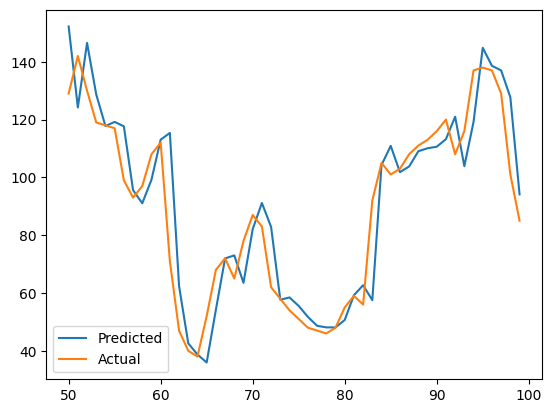

In [34]:
plt.plot(test_results['Test Predictions'][50:100], label='Predicted')
plt.plot(test_results['Actuals'][50:100], label='Actual')
plt.legend()

In [35]:
test_results['naive_seasonal'] = np.concatenate((y1_train[-54:], y1_val))
test_results.head()

,Test Predictions,Actuals,naive_seasonal
0,79.609528,51.000000,20.0
1,48.827980,35.000000,14.0
2,32.919113,27.333333,12.0
3,28.663649,19.666667,11.0
4,19.028944,12.000000,13.0


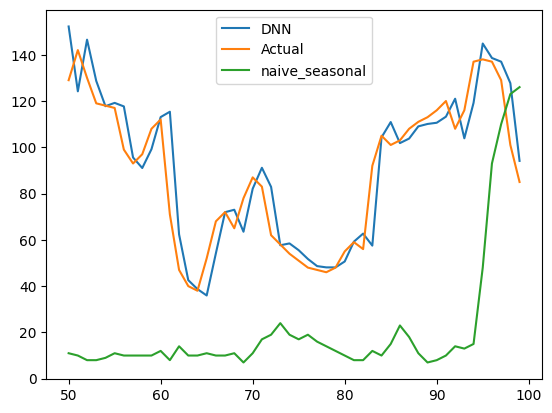

In [36]:
plt.plot(test_results['Test Predictions'][50:100], label='DNN')
plt.plot(test_results['Actuals'][50:100], label='Actual')
plt.plot(test_results['naive_seasonal'][50:100], label='naive_seasonal')
plt.legend()

In [37]:
def calculate_mape(predicted_values, actual_values):
    """
    Calculate the Mean Absolute Percentage Error (MAPE) for a list of predicted and actual values.
    
    Args:
        predicted_values (list): List of predicted values.
        actual_values (list): List of actual values.
    
    Returns:
        float: The MAPE (in percentage).
    """
    if len(predicted_values) != len(actual_values):
        raise ValueError("The number of predicted and actual values must be the same.")
    
    sum_absolute_percentage_error = 0
    count_valid_data_points = 0
    
    for predicted, actual in zip(predicted_values, actual_values):
        if actual != 0:
            absolute_percentage_error = np.abs((actual - predicted) / actual)
            sum_absolute_percentage_error += absolute_percentage_error
            count_valid_data_points += 1
    
    if count_valid_data_points > 0:
        mape = (sum_absolute_percentage_error / count_valid_data_points) * 100
        return mape
    else:
        return None  # No valid data points to calculate MAPE.

In [38]:
mape_DNN = calculate_mape(test_results['Test Predictions'], test_results['Actuals'])

mape_naive_seasonal = calculate_mape(test_results['naive_seasonal'], test_results['Actuals'])

print(mape_DNN,mape_naive_seasonal)

29.455200036515734 240.5626529651297


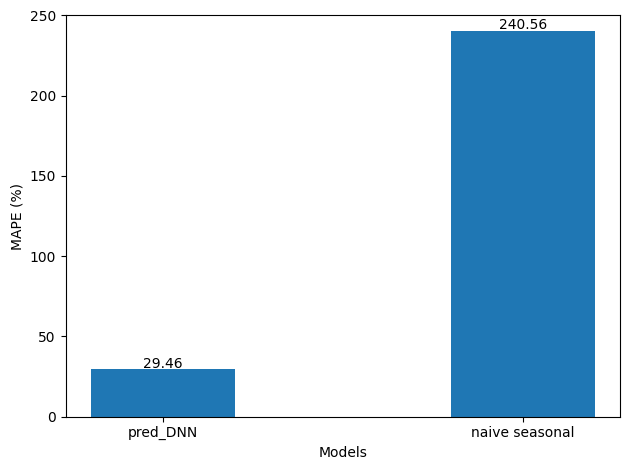

In [39]:
fig, ax = plt.subplots()

x = ['pred_DNN','naive seasonal']
y = [mape_DNN,mape_naive_seasonal]

ax.bar(x, y, width=0.4)
ax.set_xlabel('Models')
ax.set_ylabel('MAPE (%)')
ax.set_ylim(0, 250)

for index, value in enumerate(y):
    plt.text(x=index, y=value + 1, s=str(round(value,2)), ha='center')

plt.tight_layout()

CNN

In [42]:
model1 = Sequential()
#model1.add(InputLayer(WINDOW_SIZE,1))
model1.add(Conv1D(32, 2, activation='relu', input_shape=(10,4)))
model1.add(Flatten())
model1.add(Dense(16,'relu'))
model1.add(Dense(8,'relu'))
# model1.add(Dense(8, 'relu'))
model1.add(Dense(1, 'linear'))

model1.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_2 (Conv1D)               │ (None, 9, 32)          │           288 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 288)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 16)             │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,057 (19.75 KB)

 Trainable params: 5,057 (19.75 KB)

 Non-trainable params: 0 (0.00 B)

In [44]:
cp1 = ModelCheckpoint('model1/model_checkpoint.keras', save_best_only=True)
model1.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.005), metrics=[RootMeanSquaredError()])


In [45]:
model1.fit(X1_train, y1_train, validation_data=(X1_val, y1_val), epochs=10, callbacks=[cp1])

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 1281.0491 - root_mean_squared_error: 33.9653 - val_loss: 389.7499 - val_root_mean_squared_error: 19.7421
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 383.8292 - root_mean_squared_error: 19.5772 - val_loss: 336.3481 - val_root_mean_squared_error: 18.3398
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 411.2930 - root_mean_squared_error: 20.2656 - val_loss: 357.4423 - val_root_mean_squared_error: 18.9061
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 406.0724 - root_mean_squared_error: 20.1424 - val_loss: 297.4476 - val_root_mean_squared_error: 17.2467
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 399.0784 - root_mean_squared_error: 19.9678 - val_loss: 311.8601 - val_root_mean_squared_error: 17.6596
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 402.5502 - root_mean_squared_error: 20.0473 - val_loss: 322.7828 - val_root_mean_squared_error: 17.9662
Epoch 7/10
782/

In [47]:
from tensorflow.keras.models import load_model
model1 = load_model('model1/model_checkpoint.keras')

In [48]:
train_predictions = model1.predict(X1_train).flatten()
train_results = pd.DataFrame(data={'Train Predictions':train_predictions, 'Actuals':y1_train})
train_results.head()

782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


,Train Predictions,Actuals
0,2.923218,3.0
1,3.238801,3.0
2,3.487487,3.0
3,3.432938,3.0
4,3.470896,6.0


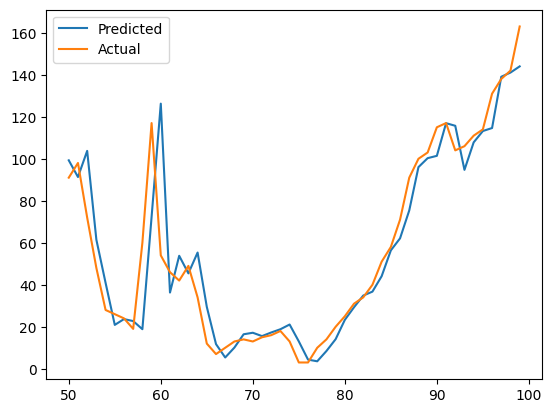

In [49]:
import matplotlib.pyplot as plt
plt.plot(train_results['Train Predictions'][50:100],label='Predicted')
plt.plot(train_results['Actuals'][50:100],label='Actual')
plt.legend()

In [50]:
val_predictions = model1.predict(X1_val).flatten()
val_results = pd.DataFrame(data={'Val Predictions':val_predictions, 'Actuals':y1_val})
val_results

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


,Val Predictions,Actuals
0,7.313544,9.0
1,7.818002,11.0
2,11.612865,10.0
3,9.898226,10.0
4,10.853964,10.0
...,...,...
4995,72.302452,67.0
4996,60.184517,51.0
4997,43.858391,64.0
4998,72.496582,67.0


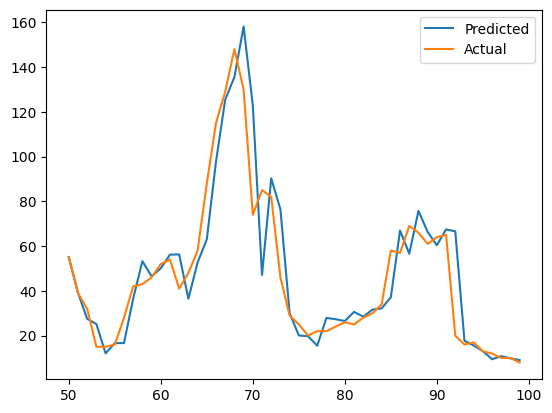

In [51]:
plt.plot(val_results['Val Predictions'][50:100], label='Predicted')
plt.plot(val_results['Actuals'][50:100], label='Actual')
plt.legend()

In [52]:
test_predictions = model1.predict(X1_test).flatten()
test_results = pd.DataFrame(data={'Test Predictions':test_predictions, 'Actuals':y1_test})
test_results

158/158 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


,Test Predictions,Actuals
0,83.550552,51.000000
1,45.488930,35.000000
2,30.782551,27.333333
3,24.576233,19.666667
4,17.400404,12.000000
...,...,...
5049,14.785236,12.000000
5050,12.988546,13.000000
5051,13.607355,16.000000
5052,16.979918,21.000000


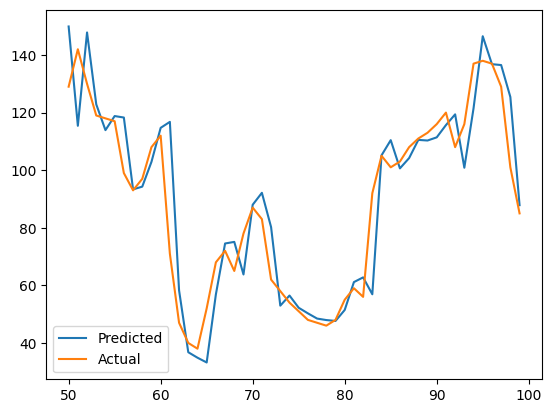

In [53]:
plt.plot(test_results['Test Predictions'][50:100], label='Predicted')
plt.plot(test_results['Actuals'][50:100], label='Actual')
plt.legend()

In [54]:
test_results['naive_seasonal'] = np.concatenate((y1_train[-54:], y1_val))
test_results.head()

,Test Predictions,Actuals,naive_seasonal
0,83.550552,51.000000,20.0
1,45.488930,35.000000,14.0
2,30.782551,27.333333,12.0
3,24.576233,19.666667,11.0
4,17.400404,12.000000,13.0


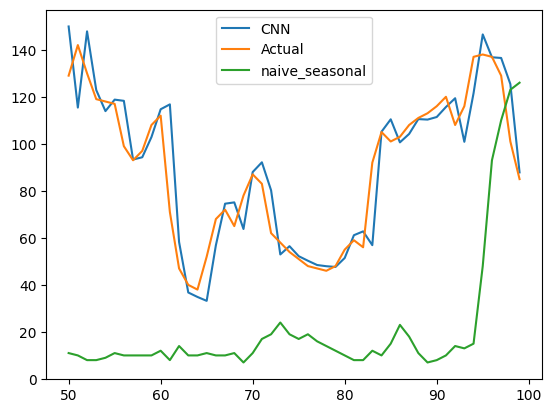

In [55]:
plt.plot(test_results['Test Predictions'][50:100], label='CNN')
plt.plot(test_results['Actuals'][50:100], label='Actual')
plt.plot(test_results['naive_seasonal'][50:100], label='naive_seasonal')
plt.legend()

In [56]:
mape_CNN = calculate_mape(test_results['Test Predictions'], test_results['Actuals'])

mape_naive_seasonal = calculate_mape(test_results['naive_seasonal'], test_results['Actuals'])

print(mape_CNN,mape_naive_seasonal)

28.19229847014901 240.5626529651297


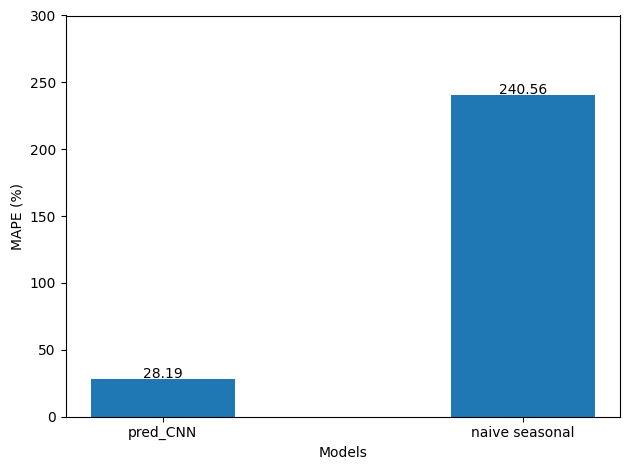

In [57]:
fig, ax = plt.subplots()

x = ['pred_CNN','naive seasonal']
y = [mape_CNN,mape_naive_seasonal]

ax.bar(x, y, width=0.4)
ax.set_xlabel('Models')
ax.set_ylabel('MAPE (%)')
ax.set_ylim(0, 300)

for index, value in enumerate(y):
    plt.text(x=index, y=value + 1, s=str(round(value,2)), ha='center')

plt.tight_layout()

ENCODED FEATURES

In [58]:
df2 = df[['PM2.5','hour_sin','hour_cos','month_sin','month_cos','day_sin','day_cos']]

In [59]:
df2

,PM2.5,hour_sin,hour_cos,month_sin,month_cos,day_sin,day_cos
0,4.0,0.000000,1.000000,1.000000,6.123234e-17,0.201299,0.979530
1,8.0,0.258819,0.965926,1.000000,6.123234e-17,0.201299,0.979530
2,7.0,0.500000,0.866025,1.000000,6.123234e-17,0.201299,0.979530
3,6.0,0.707107,0.707107,1.000000,6.123234e-17,0.201299,0.979530
4,3.0,0.866025,0.500000,1.000000,6.123234e-17,0.201299,0.979530
...,...,...,...,...,...,...,...
35059,12.0,-0.965926,0.258819,0.866025,5.000000e-01,-0.571268,0.820763
35060,13.0,-0.866025,0.500000,0.866025,5.000000e-01,-0.571268,0.820763
35061,16.0,-0.707107,0.707107,0.866025,5.000000e-01,-0.571268,0.820763
35062,21.0,-0.500000,0.866025,0.866025,5.000000e-01,-0.571268,0.820763


In [60]:
def df_to_X_y2(df, window_size):
    df_as_np = df.to_numpy()
    X = []
    y = []
    for i in range(len(df_as_np)-window_size):
        row = [r for r in df_as_np[i:i+window_size]]
        X.append(row)
        label = df_as_np[i+window_size][0]
        y.append(label)
    return np.array(X), np.array(y)


In [61]:
window_size = 10
X1, y1 = df_to_X_y2(df2,window_size)
X1.shape, y1.shape

((35054, 10, 7), (35054,))

In [62]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

In [63]:
X1_train, y1_train = X1[:25000], y1[:25000]
X1_val, y1_val = X1[25000:30000], y1[25000:30000]
X1_test, y1_test = X1[30000:], y1[30000:]
X1_train.shape, y1_train.shape, X1_val.shape, y1_val.shape, X1_test.shape, y1_test.shape

((25000, 10, 7), (25000,), (5000, 10, 7), (5000,), (5054, 10, 7), (5054,))

DNN

In [65]:
model2 = Sequential()
model2.add(InputLayer(shape=(10,7)))
model2.add(Flatten())
# model2.add(Dense(64, activation='relu'))
model2.add(Dense(32, activation='relu'))
model2.add(Dense(16, activation='relu'))
model2.add(Dense(8, activation='relu'))
model2.add(Dense(1, activation='linear'))

In [67]:
cp1 = ModelCheckpoint('model2/model_checkpoint.keras', save_best_only=True)
model2.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.005), metrics=[RootMeanSquaredError()])


In [68]:
model2.fit(X1_train, y1_train, validation_data=(X1_val, y1_val), epochs=10, callbacks=[cp1])

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 806.3565 - root_mean_squared_error: 27.9002 - val_loss: 386.3297 - val_root_mean_squared_error: 19.6553
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 856us/step - loss: 431.2827 - root_mean_squared_error: 20.7464 - val_loss: 307.8935 - val_root_mean_squared_error: 17.5469
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 811us/step - loss: 435.9482 - root_mean_squared_error: 20.8672 - val_loss: 354.0155 - val_root_mean_squared_error: 18.8153
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 832us/step - loss: 410.9036 - root_mean_squared_error: 20.2401 - val_loss: 297.1980 - val_root_mean_squared_error: 17.2394
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 981us/step - loss: 458.9582 - root_mean_squared_error: 21.4036 - val_loss: 306.5002 - val_root_mean_squared_error: 17.5071
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 883us/step - loss: 393.7755 - root_mean_squared_error: 19.8362 - val_loss: 323.5254 - val_root_mean_squared_error: 17.9868
Epoch 

In [69]:
from tensorflow.keras.models import load_model
model2 = load_model('model2/model_checkpoint.keras')

In [70]:
train_predictions = model2.predict(X1_train).flatten()
train_results = pd.DataFrame(data={'Train Predictions':train_predictions, 'Actuals':y1_train})
train_results.head()

782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


,Train Predictions,Actuals
0,5.387523,3.0
1,4.743450,3.0
2,4.853974,3.0
3,5.054333,3.0
4,5.359868,6.0


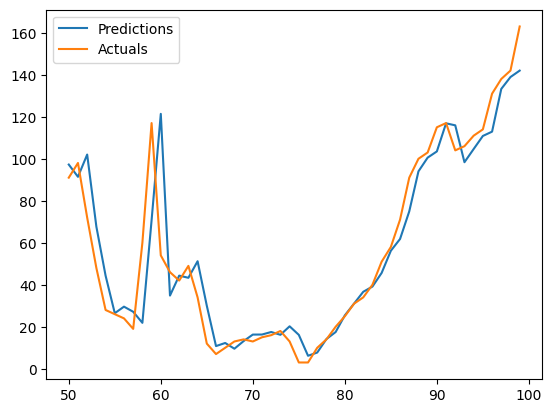

In [71]:
import matplotlib.pyplot as plt
plt.plot(train_results['Train Predictions'][50:100],label= 'Predictions')
plt.plot(train_results['Actuals'][50:100], label= 'Actuals')
plt.legend()

In [72]:
val_predictions = model2.predict(X1_val).flatten()
val_results = pd.DataFrame(data={'Val Predictions':val_predictions, 'Actuals':y1_val})
val_results.head()

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 504us/step


,Val Predictions,Actuals
0,7.198040,9.0
1,8.694763,11.0
2,11.745282,10.0
3,8.736571,10.0
4,9.082031,10.0


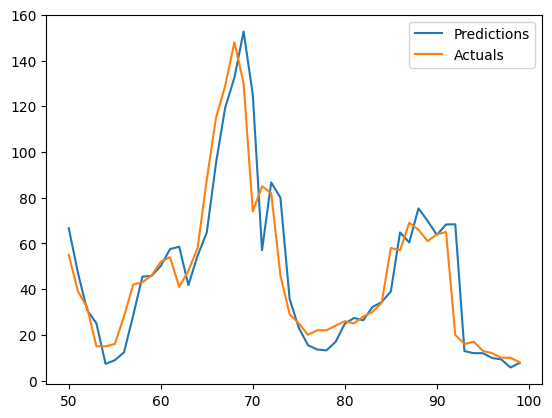

In [73]:
plt.plot(val_results['Val Predictions'][50:100], label= 'Predictions')
plt.plot(val_results['Actuals'][50:100], label= 'Actuals')
plt.legend()

In [74]:
test_predictions = model2.predict(X1_test).flatten()
test_results = pd.DataFrame(data={'Test Predictions':test_predictions, 'Actuals':y1_test})
test_results

158/158 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


,Test Predictions,Actuals
0,75.410400,51.000000
1,44.154793,35.000000
2,31.454275,27.333333
3,27.067299,19.666667
4,19.307642,12.000000
...,...,...
5049,19.430689,12.000000
5050,19.307709,13.000000
5051,20.535303,16.000000
5052,23.506849,21.000000


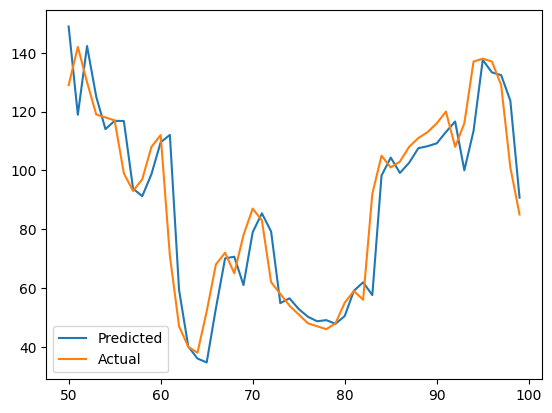

In [75]:
plt.plot(test_results['Test Predictions'][50:100], label='Predicted')
plt.plot(test_results['Actuals'][50:100], label='Actual')
plt.legend()

In [76]:
test_results['naive_seasonal'] = np.concatenate((y1_train[-54:], y1_val))
test_results.head()

,Test Predictions,Actuals,naive_seasonal
0,75.410400,51.000000,20.0
1,44.154793,35.000000,14.0
2,31.454275,27.333333,12.0
3,27.067299,19.666667,11.0
4,19.307642,12.000000,13.0


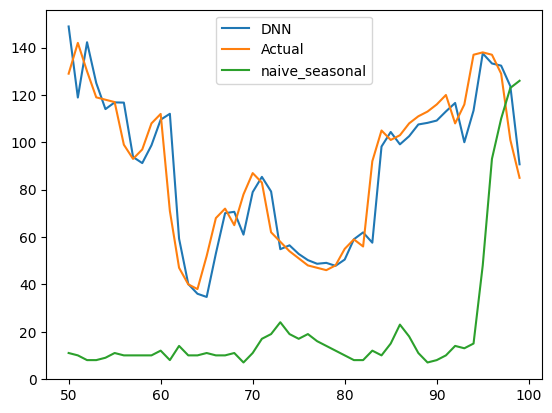

In [77]:
plt.plot(test_results['Test Predictions'][50:100], label='DNN')
plt.plot(test_results['Actuals'][50:100], label='Actual')
plt.plot(test_results['naive_seasonal'][50:100], label='naive_seasonal')
plt.legend()

In [78]:
def calculate_mape(predicted_values, actual_values):
    """
    Calculate the Mean Absolute Percentage Error (MAPE) for a list of predicted and actual values.
    
    Args:
        predicted_values (list): List of predicted values.
        actual_values (list): List of actual values.
    
    Returns:
        float: The MAPE (in percentage).
    """
    if len(predicted_values) != len(actual_values):
        raise ValueError("The number of predicted and actual values must be the same.")
    
    sum_absolute_percentage_error = 0
    count_valid_data_points = 0
    
    for predicted, actual in zip(predicted_values, actual_values):
        if actual != 0:
            absolute_percentage_error = np.abs((actual - predicted) / actual)
            sum_absolute_percentage_error += absolute_percentage_error
            count_valid_data_points += 1
    
    if count_valid_data_points > 0:
        mape = (sum_absolute_percentage_error / count_valid_data_points) * 100
        return mape
    else:
        return None  # No valid data points to calculate MAPE.

In [79]:
mape_DNN = calculate_mape(test_results['Test Predictions'], test_results['Actuals'])

mape_naive_seasonal = calculate_mape(test_results['naive_seasonal'], test_results['Actuals'])

print(mape_DNN,mape_naive_seasonal)

29.81159985040232 240.5626529651297


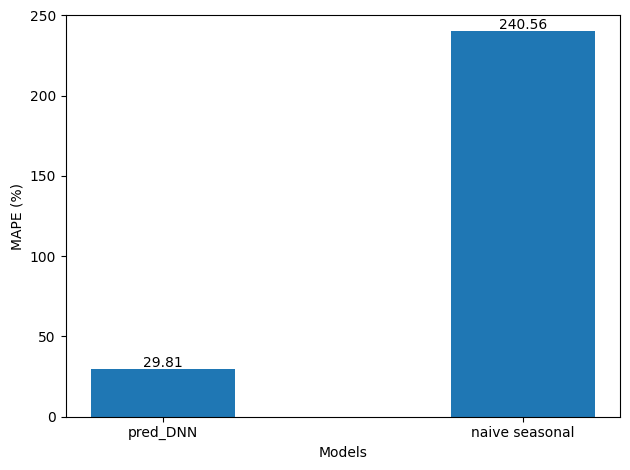

In [80]:
fig, ax = plt.subplots()

x = ['pred_DNN','naive seasonal']
y = [mape_DNN,mape_naive_seasonal]

ax.bar(x, y, width=0.4)
ax.set_xlabel('Models')
ax.set_ylabel('MAPE (%)')
ax.set_ylim(0, 250)

for index, value in enumerate(y):
    plt.text(x=index, y=value + 1, s=str(round(value,2)), ha='center')

plt.tight_layout()

CNN

In [83]:
model1 = Sequential()
#model1.add(InputLayer(WINDOW_SIZE,1))
model1.add(Conv1D(32, 2, activation='relu', input_shape=(10,7)))
model1.add(Flatten())
model1.add(Dense(16,'relu'))
model1.add(Dense(8,'relu'))
# model1.add(Dense(8, 'relu'))
model1.add(Dense(1, 'linear'))

model1.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_5 (Conv1D)               │ (None, 9, 32)          │           480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_7 (Flatten)             │ (None, 288)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 16)             │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,249 (20.50 KB)

 Trainable params: 5,249 (20.50 KB)

 Non-trainable params: 0 (0.00 B)

In [84]:
cp1 = ModelCheckpoint('model1/model_checkpoint.keras', save_best_only=True)
model1.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.005), metrics=[RootMeanSquaredError()])

In [85]:
model1.fit(X1_train, y1_train, validation_data=(X1_val, y1_val), epochs=10, callbacks=[cp1])

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 1110.2971 - root_mean_squared_error: 31.2824 - val_loss: 348.1722 - val_root_mean_squared_error: 18.6594
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 438.5089 - root_mean_squared_error: 20.9283 - val_loss: 423.0107 - val_root_mean_squared_error: 20.5672
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 441.3620 - root_mean_squared_error: 20.9978 - val_loss: 291.4472 - val_root_mean_squared_error: 17.0718
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 405.8925 - root_mean_squared_error: 20.1239 - val_loss: 303.7484 - val_root_mean_squared_error: 17.4284
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 435.2841 - root_mean_squared_error: 20.8497 - val_loss: 320.3053 - val_root_mean_squared_error: 17.8971
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 451.8163 - root_mean_squared_error: 21.2364 - val_loss: 306.8592 - val_root_mean_squared_error: 17.5174
Epoch 7/10
782/

In [86]:
from tensorflow.keras.models import load_model
model1 = load_model('model1/model_checkpoint.keras')

In [87]:
train_predictions = model1.predict(X1_train).flatten()
train_results = pd.DataFrame(data={'Train Predictions':train_predictions, 'Actuals':y1_train})
train_results.head()

782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


,Train Predictions,Actuals
0,4.375092,3.0
1,4.317210,3.0
2,4.593651,3.0
3,4.949493,3.0
4,4.550468,6.0


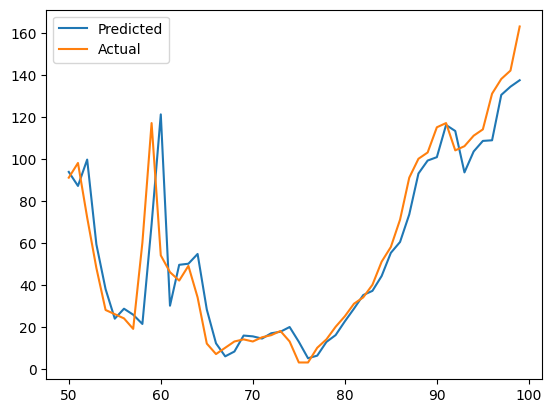

In [88]:
import matplotlib.pyplot as plt
plt.plot(train_results['Train Predictions'][50:100],label='Predicted')
plt.plot(train_results['Actuals'][50:100],label='Actual')
plt.legend()

In [89]:
val_predictions = model1.predict(X1_val).flatten()
val_results = pd.DataFrame(data={'Val Predictions':val_predictions, 'Actuals':y1_val})
val_results

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


,Val Predictions,Actuals
0,9.709975,9.0
1,11.304013,11.0
2,12.847219,10.0
3,10.261316,10.0
4,10.932550,10.0
...,...,...
4995,75.544914,67.0
4996,59.593178,51.0
4997,43.374016,64.0
4998,66.612221,67.0


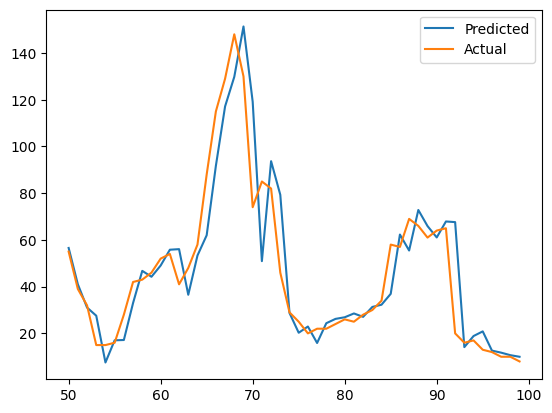

In [90]:
plt.plot(val_results['Val Predictions'][50:100], label='Predicted')
plt.plot(val_results['Actuals'][50:100], label='Actual')
plt.legend()

In [91]:
test_predictions = model1.predict(X1_test).flatten()
test_results = pd.DataFrame(data={'Test Predictions':test_predictions, 'Actuals':y1_test})
test_results

158/158 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


,Test Predictions,Actuals
0,76.421310,51.000000
1,41.221210,35.000000
2,30.623112,27.333333
3,27.048138,19.666667
4,19.461454,12.000000
...,...,...
5049,17.241592,12.000000
5050,15.804345,13.000000
5051,17.558216,16.000000
5052,20.537401,21.000000


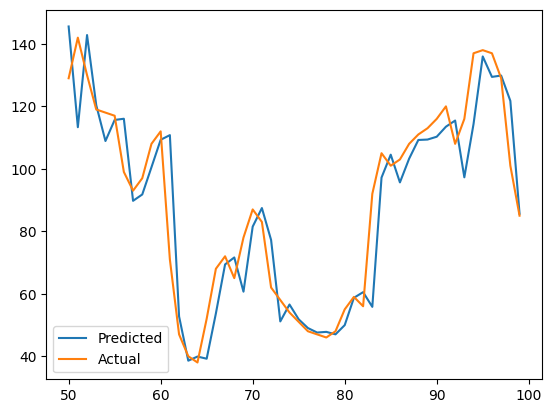

In [92]:
plt.plot(test_results['Test Predictions'][50:100], label='Predicted')
plt.plot(test_results['Actuals'][50:100], label='Actual')
plt.legend()

In [93]:
test_results['naive_seasonal'] = np.concatenate((y1_train[-54:], y1_val))
test_results.head()

,Test Predictions,Actuals,naive_seasonal
0,76.421310,51.000000,20.0
1,41.221210,35.000000,14.0
2,30.623112,27.333333,12.0
3,27.048138,19.666667,11.0
4,19.461454,12.000000,13.0


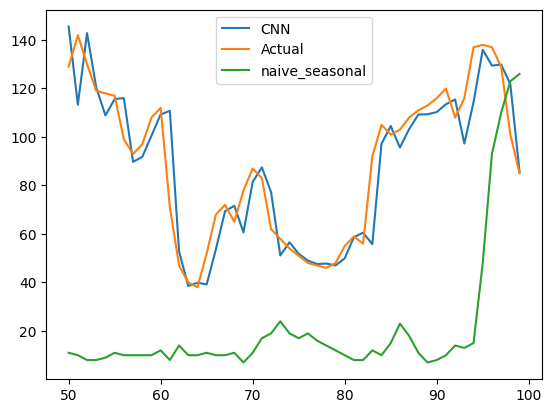

In [94]:
plt.plot(test_results['Test Predictions'][50:100], label='CNN')
plt.plot(test_results['Actuals'][50:100], label='Actual')
plt.plot(test_results['naive_seasonal'][50:100], label='naive_seasonal')
plt.legend()

In [95]:
mape_CNN = calculate_mape(test_results['Test Predictions'], test_results['Actuals'])

mape_naive_seasonal = calculate_mape(test_results['naive_seasonal'], test_results['Actuals'])

print(mape_CNN,mape_naive_seasonal)

29.67432215607495 240.5626529651297


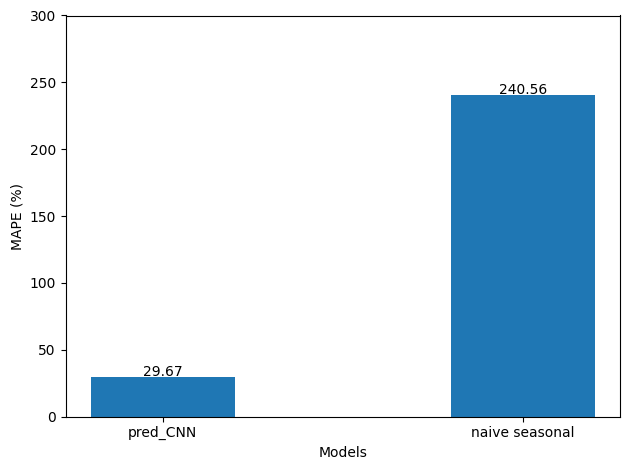

In [96]:
fig, ax = plt.subplots()

x = ['pred_CNN','naive seasonal']
y = [mape_CNN,mape_naive_seasonal]

ax.bar(x, y, width=0.4)
ax.set_xlabel('Models')
ax.set_ylabel('MAPE (%)')
ax.set_ylim(0, 300)

for index, value in enumerate(y):
    plt.text(x=index, y=value + 1, s=str(round(value,2)), ha='center')

plt.tight_layout()